<a href="https://colab.research.google.com/github/savioratharv/Compute_tasks/blob/main/ComputeTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
dataset=pd.read_csv('/content/haberman.csv')
dataset.columns=['patient_age','operation_year','positive_auxillary_nodes','survival_status']
dataset

,patient_age,operation_year,positive_auxillary_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [126]:
dataset.isnull().sum()

patient_age                 0
operation_year              0
positive_auxillary_nodes    0
survival_status             0
dtype: int64

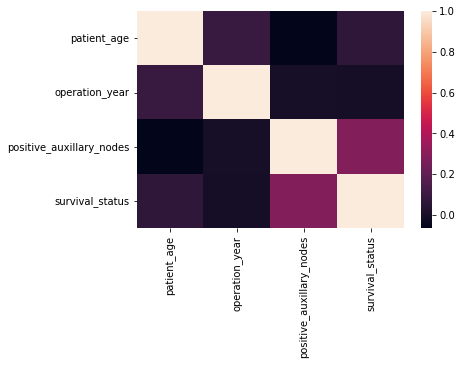

In [127]:
corr=dataset.corr()
sns.heatmap(corr)

This graph tells us how patient age and positive auxillary nodes directly correlate to the survival status of a person

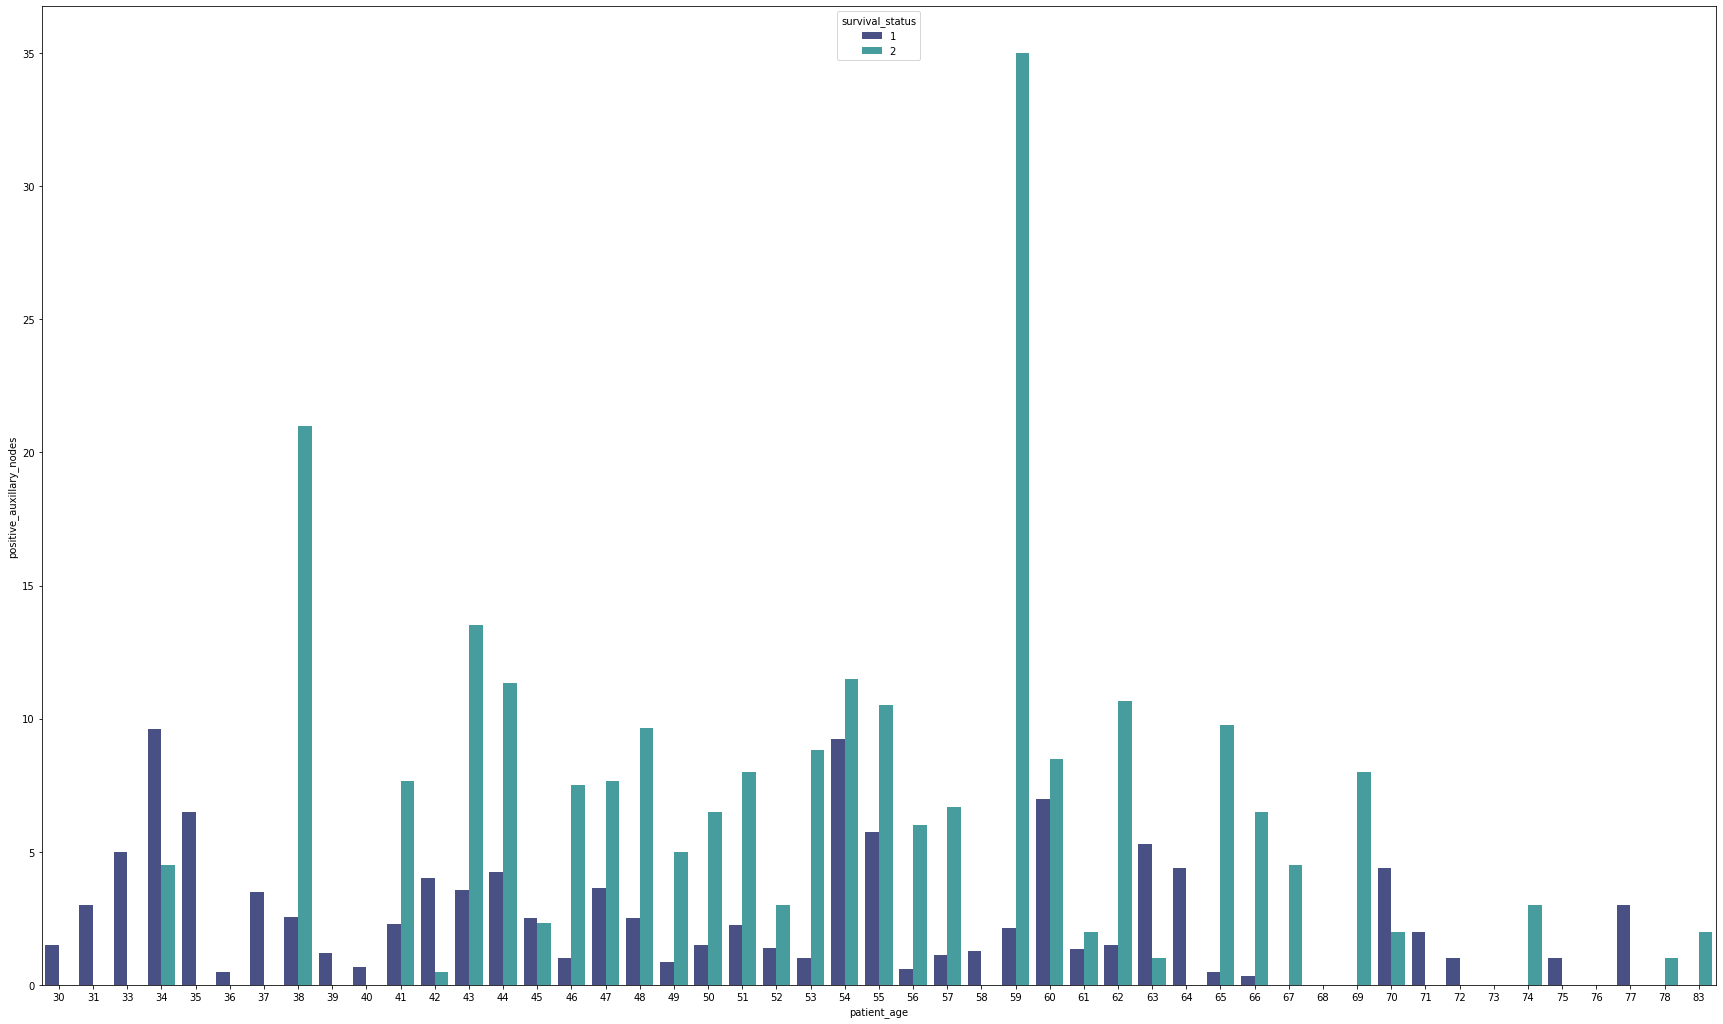

In [128]:
plt.figure(figsize=(30,18))
sns.barplot(x='patient_age',y='positive_auxillary_nodes',hue='survival_status',data=dataset,ci=None,palette='mako')

This graph tells number of people who survived or didn't survive in different operation years

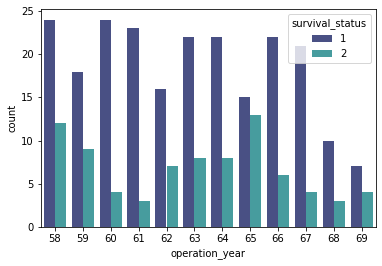

In [129]:
sns.countplot(x='operation_year',hue='survival_status',data=dataset,palette='mako')

In [130]:
df_survived=dataset[dataset['survival_status']==2] #splitting into survived or not survived
df_not_survived=dataset[dataset['survival_status']==1]

In [131]:
grp=df_survived.groupby(['patient_age','positive_auxillary_nodes']).size().reset_index(name="Count").sort_values("Count", ascending = False)

In [132]:
print(grp)

    patient_age  positive_auxillary_nodes  Count
32           52                         3      2
24           48                        11      2
4            41                         0      2
8            43                         0      2
21           47                         0      2
..          ...                       ...    ...
27           50                         0      1
26           49                        10      1
25           49                         0      1
23           48                         7      1
75           83                         2      1

[76 rows x 3 columns]


In [133]:
grp2=df_not_survived.groupby(['patient_age','positive_auxillary_nodes']).size().reset_index(name="Count").sort_values("Count", ascending = False)
print(grp2)

     patient_age  positive_auxillary_nodes  Count
89            57                         0      7
68            52                         0      6
104           61                         0      5
108           63                         0      5
29            41                         0      5
..           ...                       ...    ...
45            45                         1      1
43            44                        16      1
42            44                         1      1
40            43                        14      1
131           77                         3      1

[132 rows x 3 columns]


In [134]:
l1=dataset['operation_year'].unique()
l1.sort()
l2=[]
l3=[]
l4=[]
for i in l1:
  count=0
  count1=0
  for j in range(len(dataset['operation_year'])):
    if(i==dataset['operation_year'][j] and dataset['survival_status'][j]==2):
      count=count+1
      count1=count1+1
    elif(i==dataset['operation_year'][j]):
      count1=count1+1
  l2.append(count)
  l4.append(count1)
for i in range(len(l1)):
  l3.append(l2[i]/l4[i])

This graph tells us the survival ratios in different operation years

Text(0, 0.5, 'survived ratio')

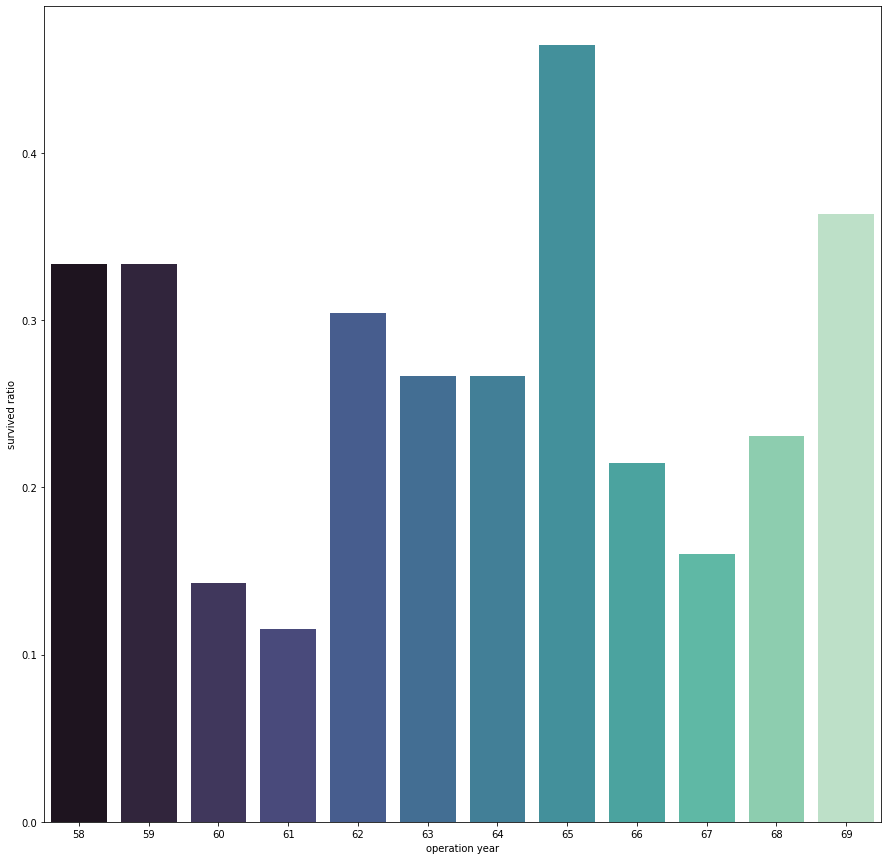

In [135]:
plt.figure(figsize=(15,15))
sns.barplot(x=l1,y=l3,palette='mako')
plt.xlabel('operation year')
plt.ylabel('survived ratio')

In [136]:
l1=dataset['patient_age'].unique()
l1.sort()
l2=[]
l3=[]
l4=[]
for i in l1:
  count=0
  count1=0
  for j in range(len(dataset['patient_age'])):
    if(i==dataset['patient_age'][j] and dataset['survival_status'][j]==2):
      count=count+1
      count1=count1+1
    elif(i==dataset['patient_age'][j]):
      count1=count1+1
  l2.append(count)
  l4.append(count1)
for i in range(len(l1)):
  l3.append(l2[i]/l4[i])


This graph shows us the ratio of patients who survived in each age group

Text(0, 0.5, 'survived ratio')

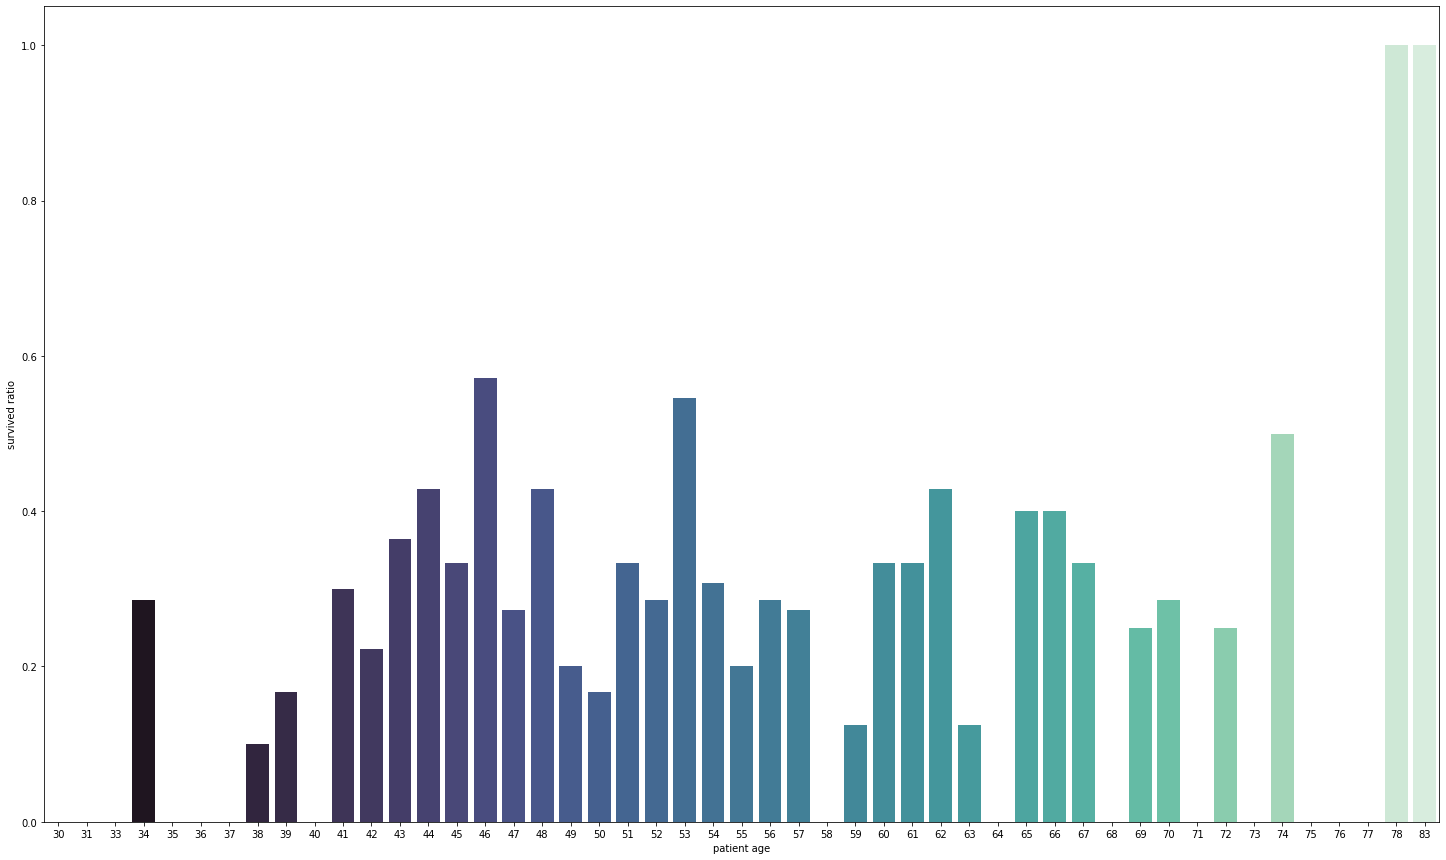

In [137]:
plt.figure(figsize=(25,15))
sns.barplot(x=l1,y=l3,palette='mako')
plt.xlabel('patient age')
plt.ylabel('survived ratio')